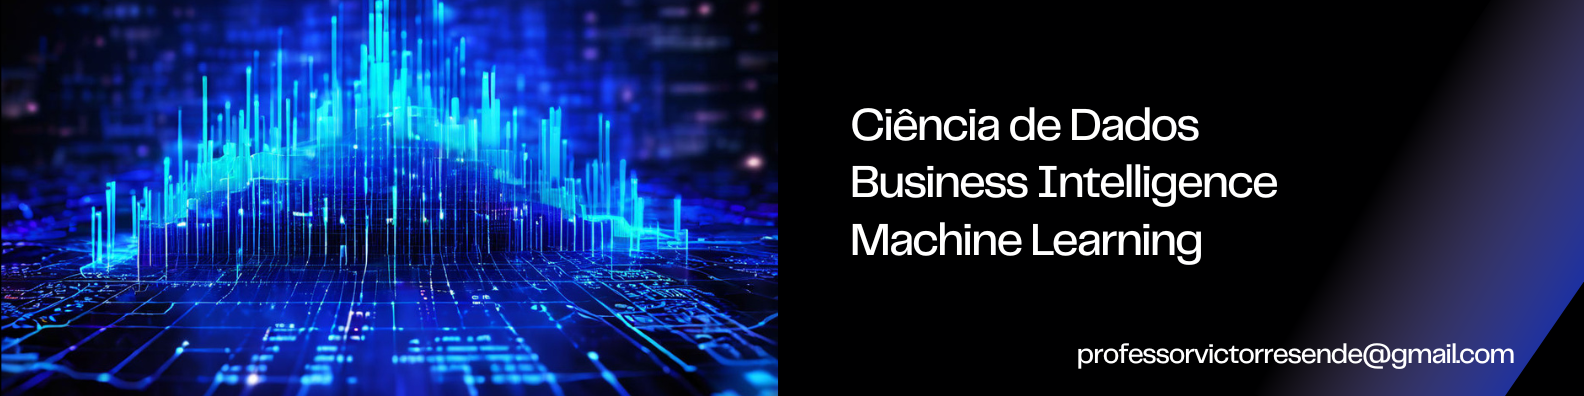

# **Projeto: Enchentes no Brasil e seus impactos futuros**
### **Victor Resende**

_____________

# **üåäProjeto aut√¥nomo sobre Enchentes no Brasil e seus impactos futuros**

O presente projeto tem como objetivo analisar a ocorr√™ncia de enchentes no Brasil entre 1991 e 2023, utilizando dados oficiais provenientes do Sistema Integrado de Informa√ß√µes sobre Desastres [(S2iD)](https://s2id.mi.gov.br/paginas/atlas/index.xhtml). A proposta central √© compreender a distribui√ß√£o temporal, espacial e financeira dos eventos relacionados a enchentes, inunda√ß√µes e alagamentos, bem como projetar suas ocorr√™ncias futuras at√© o ano de 2093 por meio de t√©cnicas de machine learning.

A motiva√ß√£o para o estudo decorre da crescente frequ√™ncia e intensidade de desastres naturais no pa√≠s, muitas vezes agravados por mudan√ßas clim√°ticas, urbaniza√ß√£o desordenada e fragilidade da infraestrutura urbana. O projeto visa apoiar decis√µes p√∫blicas, planejamento urbano e a√ß√µes preventivas, oferecendo *insights* visualmente acess√≠veis por meio de mapas interativos, gr√°ficos regionais e um painel interativo em Streamlit.

A base que utilizamos possui os seguintes dados:

| Nome da Coluna        | Tipo de Dado | Descri√ß√£o                                                          |
| --------------------- | ------------ | ------------------------------------------------------------------ |
| `Data_Evento`         | datetime     | Data do evento de enchente/inunda√ß√£o                               |
| `Ano`                 | int          | Ano extra√≠do da data do evento                                     |
| `Nome_Municipio`      | string       | Nome do munic√≠pio afetado                                          |
| `Sigla_UF`            | string       | Sigla da Unidade Federativa (UF)                                   |
| `regiao`              | string       | Regi√£o do pa√≠s (Norte, Nordeste, etc.)                             |
| `descricao_tipologia` | string       | Descri√ß√£o do tipo de desastre                                      |
| `PEPL_total_publico`  | float        | Valor do preju√≠zo p√∫blico estimado (infraestrutura, escolas, etc.) |
| `PEPR_total_privado`  | float        | Valor do preju√≠zo privado estimado (moradias, com√©rcios, etc.)     |
| `Qtd_Eventos`         | int          | Quantidade de eventos registrados em an√°lises agregadas            |
| `lat`                 | float        | Latitude do munic√≠pio para georreferenciamento                     |
| `lon`                 | float        | Longitude do munic√≠pio                                             |
| `municipio_completo`  | string       | Nome do munic√≠pio com UF e pa√≠s                                    |
| `Anos_com_Registro`   | int          | N√∫mero de anos em que o munic√≠pio registrou eventos                |
| `Prejuizo_Publico`    | float        | Soma total dos preju√≠zos p√∫blicos por munic√≠pio                    |
| `Prejuizo_Privado`    | float        | Soma total dos preju√≠zos privados por munic√≠pio                    |



A an√°lise se divide em tr√™s grandes etapas:

**1. Explora√ß√£o dos dados e visualiza√ß√µes descritivas**, incluindo tratamento de valores ausentes, an√°lise regional e municipal, al√©m de preju√≠zos financeiros estimados.

**2. Modelagem preditiva com algoritmos de regress√£o (Random Forest, Ridge e Regress√£o Polinomial)**, aplicados para prever a quantidade de eventos at√© 2093 sob diferentes cen√°rios.

**3. Conclus√µes e discuss√µes** para a preven√ß√£o de riscos futuros com o aumento das enchentes e cen√°rios potencilamente nocivos para o pa√≠s. Visualiza√ß√£o interativa com mapa, gr√°ficos sazonais/regionais e painel em Streamlit, com a exporta√ß√£o dos dados de previs√£o at√© o ano de 2093.


_____________

## Instala√ß√µes necess√°rias:

In [16]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install geopy


## Carregando as Bibliotecas Necess√°rias:

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings('ignore')
import os
import folium
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import time


## 1. Coleta e Explora√ß√£o dos Dados:

### 1.1 Verificando o arquivo:

In [19]:
# Caminho do arquivo (com r'' para tratar as barras invertidas do Windows):
file_path = r"C:\Users\User\Documents\VHR_TECH\EBAC\Dados e Projetos\An√°lise Espacial das √Åreas de Risco de Enchentes\Projeto Streamlit\enchentes_1991_2023.csv"

# Carregando o CSV, tentando detectar separador automaticamente e pulando linhas problem√°ticas:
df = pd.read_csv(file_path, sep=None, engine="python", encoding="utf-8", on_bad_lines='skip')

# Exibindo as 5 primeiras linhas do DataFrame:
df.head()

ÔªøProtocolo_S2iD  Nome_Municipio Sigla_UF regiao Data_Registro  \
0  SC-D-4215406-14110-19910107    Salto Veloso       SC    Sul    07/01/1991   
1  RS-D-4313102-14110-19910112      Nova Palma       RS    Sul    12/01/1991   
2  RS-D-4304952-14110-19910115        Caseiros       RS    Sul    15/01/1991   
3  SC-D-4208609-14110-19910115          Jabor√°       SC    Sul    15/01/1991   
4  SC-D-4207650-14110-19910118  Ipor√£ do Oeste       SC    Sul    18/01/1991   

  Data_Evento  Cod_Cobrade tipologia descricao_tipologia grupo_de_desastre  \
0  07/01/1991        14110      4,00     Estiagem e Seca     Climatol√≥gico   
1  12/01/1991        14110      4,00     Estiagem e Seca     Climatol√≥gico   
2  15/01/1991        14110      4,00     Estiagem e Seca     Climatol√≥gico   
3  15/01/1991        14110      4,00     Estiagem e Seca     Climatol√≥gico   
4  18/01/1991        14110      4,00     Estiagem e Seca     Climatol√≥gico   

   ...  PEPL_Ensino (R$) PEPL_total_publico PEPR_Descricao  \
0  ...              0,00               0,00            NaN   
1  ...              0,00               0,00            NaN   
2  ...              0,00               0,00            NaN   
3  ...              0,00               0,00            NaN   
4  ...              0,00               0,00            NaN   

  PEPR_Agricultura (R$)  PEPR_Pecu√°ria (R$)  PEPR_Ind√∫stria (R$)  \
0                  0,00                0,00                 0,00   
1                  0,00                0,00                 0,00   
2                  0,00                0,00                 0,00   
3                  0,00                0,00                 0,00   
4                  0,00                0,00                 0,00   

   PEPR_Com√©rcio (R$)  PEPR_Servi√ßos (R$)  PEPR_total_privado  PE_PLePR  
0                0,00                0,00                0,00      0,00  
1                0,00                0,00                0,00      0,00  
2                0,00                0,00                0,00      0,00  
3                0,00                0,00                0,00      0,00  
4                0,00                0,00                0,00      0,00  

[5 rows x 69 columns]

In [20]:
# Mostrando informa√ß√µes gerais do DataFrame:
print("\nResumo das colunas e tipos de dados:\n")
df.info()



Resumo das colunas e tipos de dados:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67230 entries, 0 to 67229
Data columns (total 69 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ÔªøProtocolo_S2iD                 67230 non-null  object
 1   Nome_Municipio                  67230 non-null  object
 2   Sigla_UF                        67230 non-null  object
 3   regiao                          67230 non-null  object
 4   Data_Registro                   67230 non-null  object
 5   Data_Evento                     67230 non-null  object
 6   Cod_Cobrade                     67230 non-null  int64 
 7   tipologia                       67230 non-null  object
 8   descricao_tipologia             67230 non-null  object
 9   grupo_de_desastre               67230 non-null  object
 10  Cod_IBGE_Mun                    67230 non-null  int64 
 11  Setores Censit√°rios             21846 non-null  object
 12  Stat

### 1.2 Tratando dados ausentes:

In [21]:
# 1. Mostrar total de valores ausentes por coluna:
print("üîé Valores ausentes por coluna:\n")
print(df.isnull().sum().sort_values(ascending=False))

# 2. Remover colunas com mais de 70% de valores ausentes:
limite_nulos = 0.7  # 70%
colunas_para_dropar = df.columns[df.isnull().mean() > limite_nulos]
df = df.drop(columns=colunas_para_dropar)

print(f"\n‚úÖ Colunas removidas (mais de {int(limite_nulos*100)}% de nulos):")
print(list(colunas_para_dropar))

# 3. Preencher valores nulos em colunas espec√≠ficas (exemplos)
# - Datas: preencher com "Data_Registro" caso "Data_Evento" esteja nula
if "Data_Evento" in df.columns and "Data_Registro" in df.columns:
    df["Data_Evento"].fillna(df["Data_Registro"], inplace=True)

# - Valores financeiros: converter para float e preencher com 0
colunas_valores = [col for col in df.columns if "R$" in col or "PEPR_" in col or "PEPL_" in col]
for col in colunas_valores:
    try:
        df[col] = df[col].str.replace(",", ".").astype(float)
        df[col].fillna(0, inplace=True)
    except:
        continue  # pula se n√£o for aplic√°vel

# 4. Remover linhas com muitos nulos (opcional)
df = df.dropna(thresh=5)  # mant√©m linhas com pelo menos 5 valores n√£o nulos

# 5. Resultado final
print(f"\nüìê Dimens√µes finais do dataset: {df.shape}")
print("‚úÖ Dados ausentes tratados com sucesso!")


üîé Valores ausentes por coluna:

DA_Polui/cont do ar               66936
DA_Polui/cont do solo             66670
DA_Polui/cont da √°gua             66004
DA_Inc√™ndi parques/APA's/APP's    65721
DA_Dimi/exauri h√≠drico            65403
                                  ...  
DM_Inst Ensino Destruidas             0
DM_Inst Ensino Valor                  0
DM_Inst Servi√ßos Danificadas          0
DM_Inst Servi√ßos Destruidas           0
PE_PLePR                              0
Length: 69, dtype: int64

‚úÖ Colunas removidas (mais de 70% de nulos):
['DM_Descricao', 'DA_Descricao', 'DA_Polui/cont da √°gua', 'DA_Polui/cont do ar', 'DA_Polui/cont do solo', 'DA_Dimi/exauri h√≠drico', "DA_Inc√™ndi parques/APA's/APP's"]

üìê Dimens√µes finais do dataset: (67230, 62)
‚úÖ Dados ausentes tratados com sucesso!


### 1.3 An√°lise Explorat√≥ria de Dados:

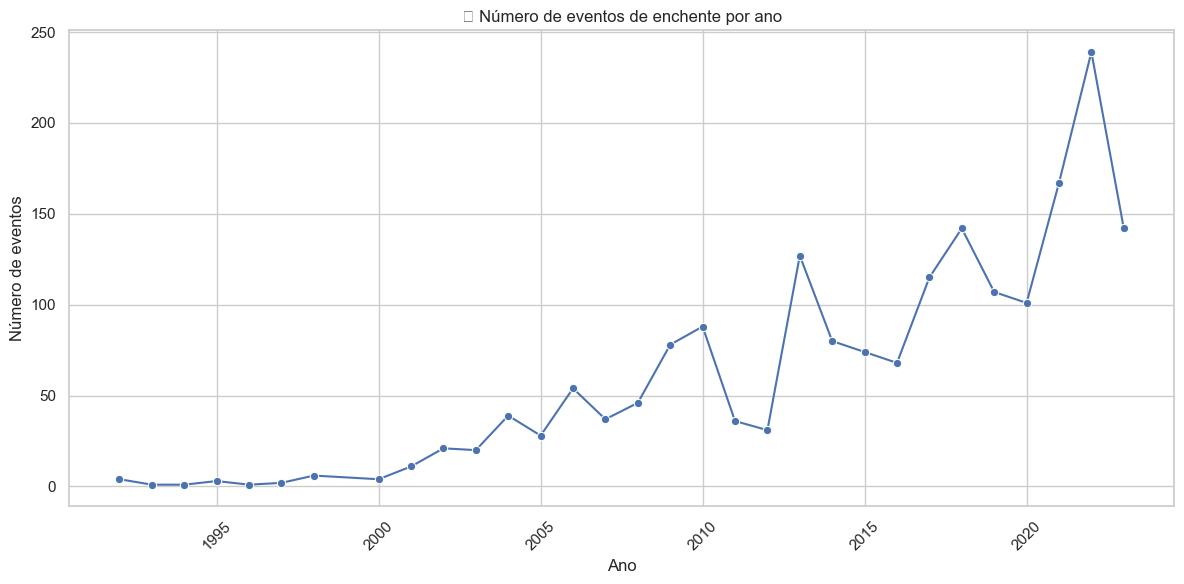

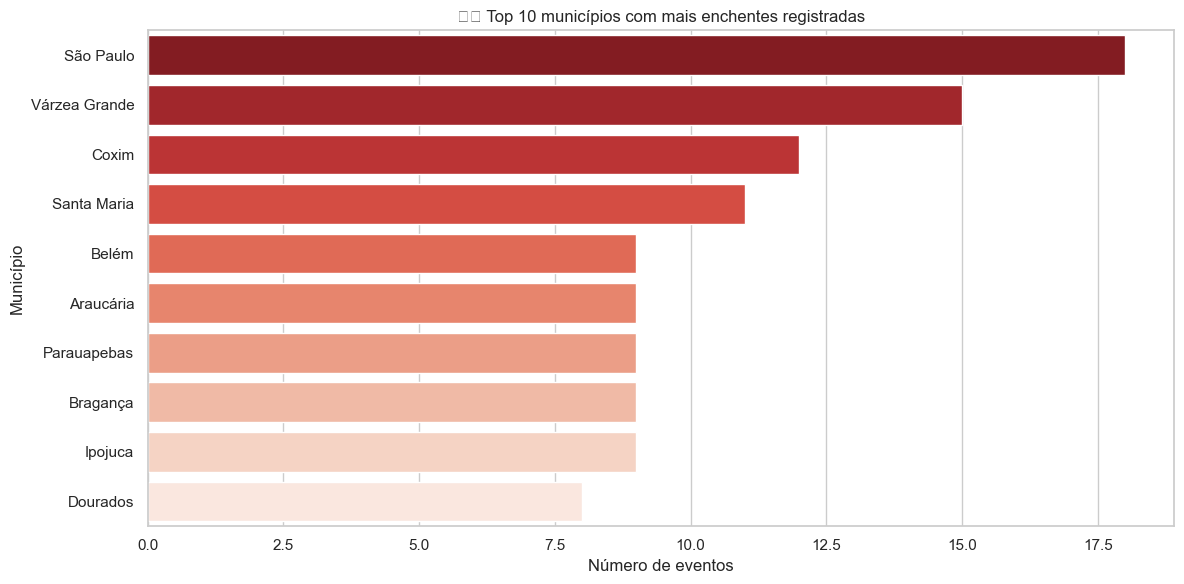

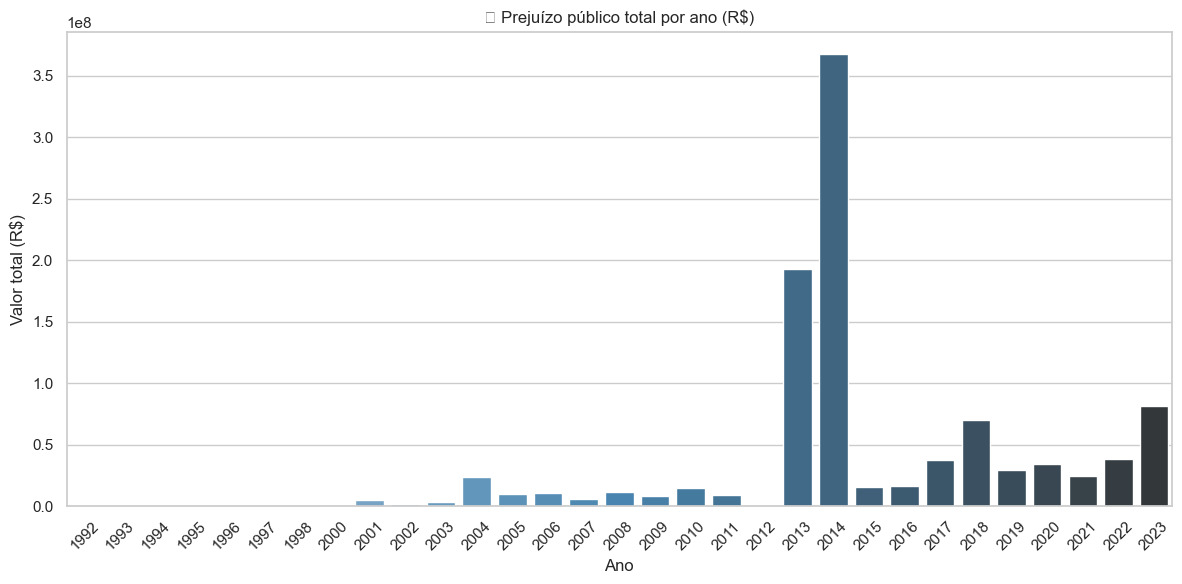

In [22]:
# Estilo visual:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Caminho do arquivo local:
file_path = r"C:\Users\User\Documents\VHR_TECH\EBAC\Dados e Projetos\An√°lise Espacial das √Åreas de Risco de Enchentes\Projeto Streamlit\enchentes_1991_2023.csv"

# Carregar os dados com tratamento de erros:
df = pd.read_csv(file_path, sep=None, engine="python", encoding="utf-8", on_bad_lines='skip')

# ====================
# Tratamento de Dados
# ====================

# Remover colunas com mais de 70% de valores ausentes:
limite_nulos = 0.7
colunas_para_dropar = df.columns[df.isnull().mean() > limite_nulos]
df.drop(columns=colunas_para_dropar, inplace=True)

# Preencher datas ausentes:
if "Data_Evento" in df.columns and "Data_Registro" in df.columns:
    df["Data_Evento"].fillna(df["Data_Registro"], inplace=True)

# Converter colunas monet√°rias (se existirem):
colunas_valores = [col for col in df.columns if "R$" in col or "PEPR_" in col or "PEPL_" in col]
for col in colunas_valores:
    try:
        df[col] = df[col].str.replace(",", ".").astype(float)
        df[col].fillna(0, inplace=True)
    except:
        continue

# Remover linhas com menos de 5 valores n√£o nulos:
df.dropna(thresh=5, inplace=True)

# ====================
# An√°lise Explorat√≥ria
# ====================

# C√≥pia para EDA:
df_eda = df.copy()

# Converter datas e criar coluna de ano:
df_eda["Data_Evento"] = pd.to_datetime(df_eda["Data_Evento"], errors="coerce", dayfirst=True)
df_eda["Ano"] = df_eda["Data_Evento"].dt.year

# Filtrar somente enchentes/inunda√ß√µes:
filtro_enchente = df_eda["descricao_tipologia"].str.contains("enchente|inunda√ß√£o|alagamento", case=False, na=False)
df_enchentes = df_eda[filtro_enchente]

# 1. Eventos por ano:
eventos_por_ano = df_enchentes["Ano"].value_counts().sort_index()

plt.figure()
sns.lineplot(x=eventos_por_ano.index, y=eventos_por_ano.values, marker="o")
plt.title("üìÖ N√∫mero de eventos de enchente por ano")
plt.xlabel("Ano")
plt.ylabel("N√∫mero de eventos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Munic√≠pios mais afetados:
top_municipios = df_enchentes["Nome_Municipio"].value_counts().head(10)

plt.figure()
sns.barplot(x=top_municipios.values, y=top_municipios.index, palette="Reds_r")
plt.title("üèòÔ∏è Top 10 munic√≠pios com mais enchentes registradas")
plt.xlabel("N√∫mero de eventos")
plt.ylabel("Munic√≠pio")
plt.tight_layout()
plt.show()

# 3. Preju√≠zo p√∫blico total por ano:
if "PEPL_total_publico" in df_enchentes.columns:
    prejuizos_anuais = df_enchentes.groupby("Ano")["PEPL_total_publico"].sum()

    plt.figure()
    sns.barplot(x=prejuizos_anuais.index, y=prejuizos_anuais.values, palette="Blues_d")
    plt.title("üí∞ Preju√≠zo p√∫blico total por ano (R$)")
    plt.xlabel("Ano")
    plt.ylabel("Valor total (R$)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


_________

### üìä 1. N√∫mero de eventos de enchente por ano:
Essa linha do tempo mostra a evolu√ß√£o anual dos registros de enchentes.

üß† Insights:

H√° anos com picos evidentes, o que pode indicar:

> Eventos clim√°ticos extremos (ex: El Ni√±o, La Ni√±a).

> Aumento na capacidade de registro (ex: implanta√ß√£o do S2iD ou leis de notifica√ß√£o).

> A tend√™ncia pode estar aumentando ou oscilando conforme a pol√≠tica de registros e mudan√ßas clim√°ticas.

### üèòÔ∏è 2. Top 10 munic√≠pios mais afetados por enchentes
Esse gr√°fico mostra os munic√≠pios com maior n√∫mero de eventos registrados.

üß† Insights:

> Munic√≠pios recorrentes indicam alta vulnerabilidade h√≠drica.

> Pode-se investigar se s√£o capitais, cidades ribeirinhas ou urbanizadas sem drenagem adequada.

> Interessante cruzar com dados geogr√°ficos e socioecon√¥micos (IDH, PIB, altitude etc.)

### üí∞ 3. Preju√≠zo p√∫blico total por ano (R$)
Mostra a soma dos danos financeiros p√∫blicos (como infraestrutura, sa√∫de, escolas etc.) por ano.

üß† Insights:

> Os anos com alto n√∫mero de eventos nem sempre correspondem aos anos de maior preju√≠zo.

> Pode revelar eventos isolados muito severos.

> √ötil para tomada de decis√£o em aloca√ß√£o de verba para preven√ß√£o e mitiga√ß√£o.

__________

In [23]:
# =======================
# ETAPA 1: Preparar os dados
# =======================

# Filtrar apenas enchentes:
filtro = df["descricao_tipologia"].str.contains("enchente|inunda√ß√£o|alagamento", case=False, na=False)
df_enchente = df[filtro].copy()

# Contar n√∫mero de eventos por munic√≠pio + UF:
eventos_municipio = df_enchente.groupby(["Nome_Municipio", "Sigla_UF"]).size().reset_index(name="Qtd_Eventos")

# Criar coluna com nome completo do munic√≠pio:
eventos_municipio["municipio_completo"] = eventos_municipio["Nome_Municipio"] + ", " + eventos_municipio["Sigla_UF"] + ", Brasil"

# =======================
# ETAPA 2: Geocodificar munic√≠pios:
# =======================

# Geocoder do Nominatim:
geolocator = Nominatim(user_agent="enchentes_app")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Obter coordenadas:
latitudes = []
longitudes = []

print("üîÑ Localizando coordenadas. Pode levar alguns minutos...")

for local in eventos_municipio["municipio_completo"]:
    try:
        location = geocode(local)
        latitudes.append(location.latitude)
        longitudes.append(location.longitude)
    except:
        latitudes.append(None)
        longitudes.append(None)

eventos_municipio["lat"] = latitudes
eventos_municipio["lon"] = longitudes

# Remover linhas sem coordenadas:
eventos_municipio = eventos_municipio.dropna(subset=["lat", "lon"])

# =======================
# ETAPA 3: Criar o mapa com Folium
# =======================

# Criar mapa centralizado no Brasil:
mapa = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

# Adicionar c√≠rculos no mapa:
for _, row in eventos_municipio.iterrows():
    folium.CircleMarker(
        location=[row["lat"], row["lon"]],
        radius=row["Qtd_Eventos"] * 0.3,  # Tamanho proporcional
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"{row['Nome_Municipio']} ({row['Sigla_UF']}): {row['Qtd_Eventos']} eventos"
    ).add_to(mapa)

# Exibir o mapa:
mapa


üîÑ Localizando coordenadas. Pode levar alguns minutos...


‚úÖ Resultado:
Temos um mapa interativo com c√≠rculos azuis indicando onde mais ocorreram enchentes. O tamanho do c√≠rculo reflete a quantidade de eventos.

__________

### ‚úÖ Gr√°ficos Regionais e Sazonais

#### üìä A) Evolu√ß√£o por Regi√£o:

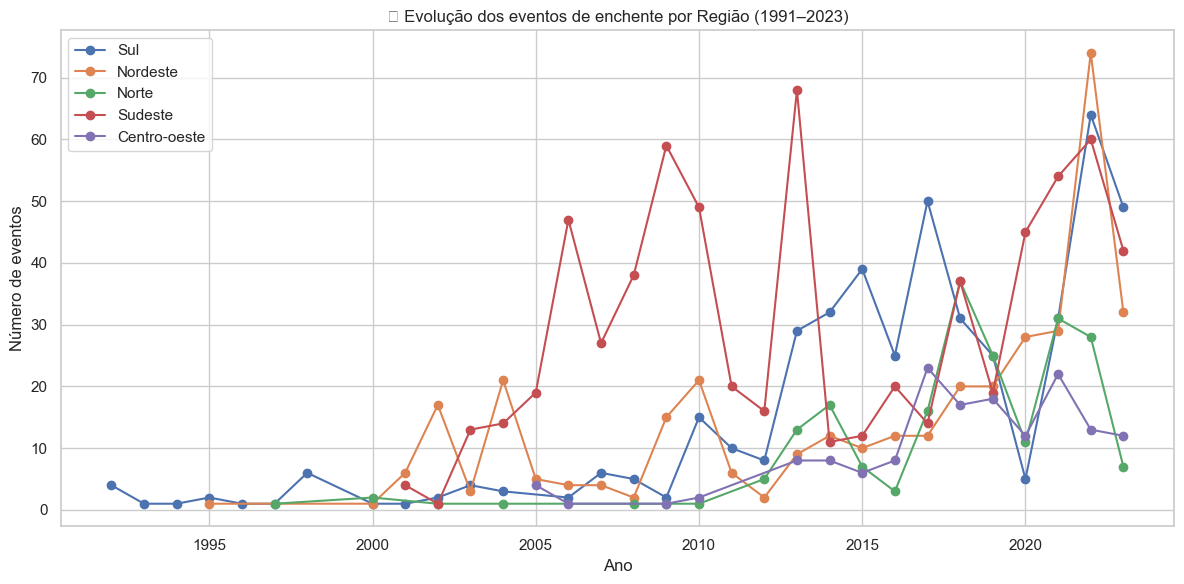

In [43]:
# Agrupar por ano e regi√£o:
eventos_regiao = df_enchente.groupby(["Ano", "regiao"]).size().reset_index(name="Qtd_Eventos")

# Gr√°fico:
plt.figure(figsize=(12, 6))
for regiao in eventos_regiao["regiao"].unique():
    dados = eventos_regiao[eventos_regiao["regiao"] == regiao]
    plt.plot(dados["Ano"], dados["Qtd_Eventos"], marker='o', label=regiao)

plt.title("üìç Evolu√ß√£o dos eventos de enchente por Regi√£o (1991‚Äì2023)")
plt.xlabel("Ano")
plt.ylabel("N√∫mero de eventos")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### üìÜ B) Distribui√ß√£o Sazonal (por m√™s):

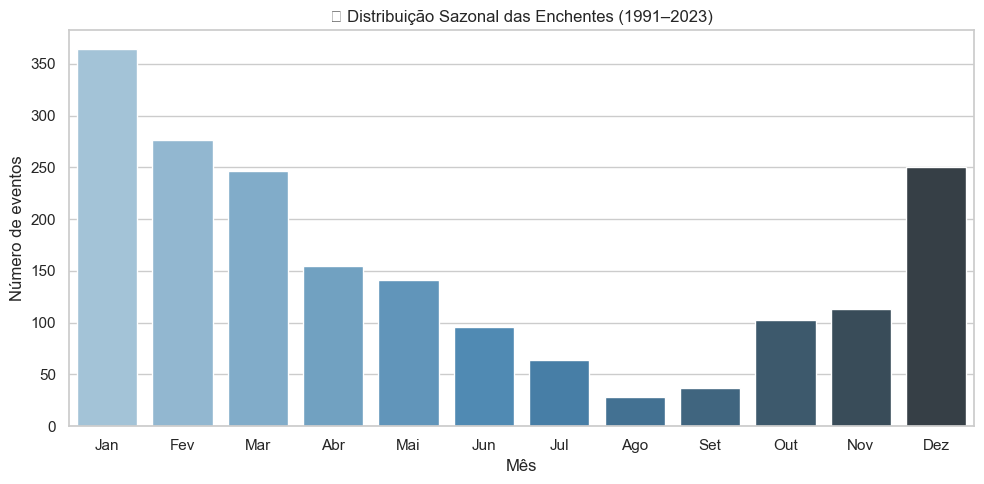

In [42]:
# Criar coluna com m√™s:
df_enchente["Mes"] = df_enchente["Data_Evento"].dt.month

# Agrupar por m√™s:
eventos_mes = df_enchente["Mes"].value_counts().sort_index()
nomes_meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

# Gr√°fico:
plt.figure(figsize=(10, 5))
sns.barplot(x=nomes_meses, y=eventos_mes.values, palette="Blues_d")
plt.title("üìÜ Distribui√ß√£o Sazonal das Enchentes (1991‚Äì2023)")
plt.xlabel("M√™s")
plt.ylabel("N√∫mero de eventos")
plt.tight_layout()
plt.show()


## 2. Modelagem e An√°lise dos Dados:


üìä Avalia√ß√£o do modelo: Random Forest
R¬≤ Score: 0.712
RMSE: 0.94
----------------------------------------

üìä Avalia√ß√£o do modelo: Ridge Regression
R¬≤ Score: 0.786
RMSE: 0.81
----------------------------------------


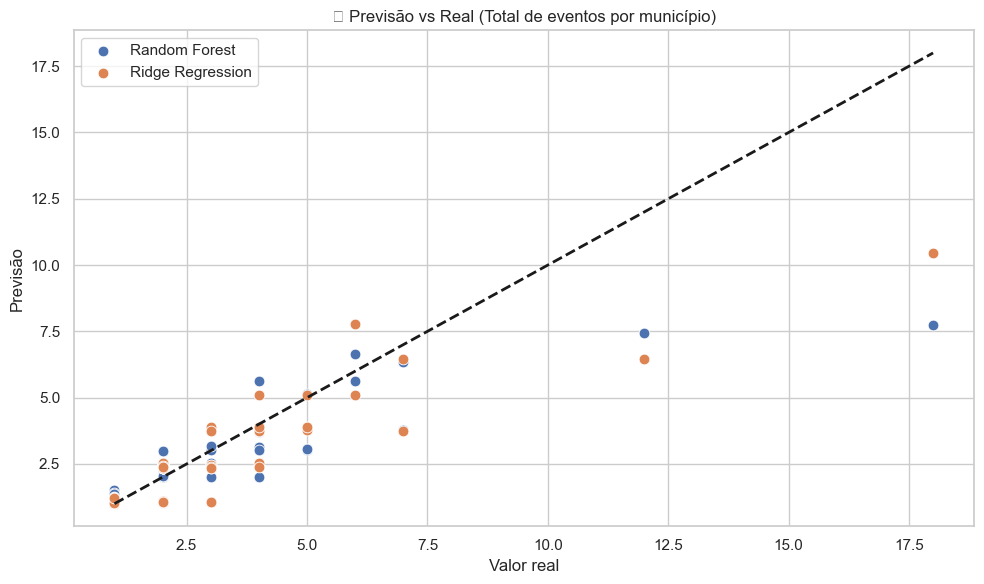

In [28]:
# =============================
# ETAPA 1: FILTRAR E PREPARAR OS DADOS
# =============================

# Filtrar apenas registros de enchente/inunda√ß√£o/alagamento:
filtro = df["descricao_tipologia"].str.contains("enchente|inunda√ß√£o|alagamento", case=False, na=False)
df_enchente = df[filtro].copy()

# Converter data e extrair ano:
df_enchente["Data_Evento"] = pd.to_datetime(df_enchente["Data_Evento"], errors="coerce", dayfirst=True)
df_enchente["Ano"] = df_enchente["Data_Evento"].dt.year

# =============================
# ETAPA 2: AGRUPAR POR MUNIC√çPIO
# =============================

df_modelo = df_enchente.groupby(["Nome_Municipio", "Sigla_UF", "regiao"]).agg({
    "Ano": ["count", "nunique"],
    "PEPL_total_publico": "sum",
    "PEPR_total_privado": "sum"
}).reset_index()

# Renomear colunas:
df_modelo.columns = [
    "Municipio", "UF", "Regiao",
    "Total_Eventos", "Anos_com_Registro",
    "Prejuizo_Publico", "Prejuizo_Privado"
]

df_modelo.fillna(0, inplace=True)

# =============================
# ETAPA 3: TRATAMENTO DE VARI√ÅVEIS
# =============================

# Usar pandas.get_dummies() para codificar a regi√£o:
regioes_df = pd.get_dummies(df_modelo["Regiao"], drop_first=True)

# Features:
X = pd.concat([
    df_modelo[["Anos_com_Registro", "Prejuizo_Publico", "Prejuizo_Privado"]],
    regioes_df
], axis=1)

# Vari√°vel alvo:
y = df_modelo["Total_Eventos"]

# =============================
# ETAPA 4: DIVIS√ÉO TREINO/TESTE
# =============================

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =============================
# ETAPA 5: TREINAR MODELOS
# =============================

# Random Forest:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Ridge Regression:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# =============================
# ETAPA 6: AVALIA√á√ÉO
# =============================

def avaliar_modelo(nome, y_real, y_previsto):
    print(f"\nüìä Avalia√ß√£o do modelo: {nome}")
    print(f"R¬≤ Score: {r2_score(y_real, y_previsto):.3f}")
    print(f"RMSE: {mean_squared_error(y_real, y_previsto, squared=False):.2f}")
    print("-" * 40)

avaliar_modelo("Random Forest", y_test, y_pred_rf)
avaliar_modelo("Ridge Regression", y_test, y_pred_ridge)

# =============================
# ETAPA 7: VISUALIZA√á√ÉO
# =============================

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, label="Random Forest", s=60)
sns.scatterplot(x=y_test, y=y_pred_ridge, label="Ridge Regression", s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("üîç Previs√£o vs Real (Total de eventos por munic√≠pio)")
plt.xlabel("Valor real")
plt.ylabel("Previs√£o")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### ‚úÖ Resumo dos Insights - Tend√™ncia de Enchentes no Brasil

üìå 1. Ano com mais eventos reais registrados
Ano: 2022

N√∫mero de eventos: 239

üß† Isso representa o pico hist√≥rico de notifica√ß√µes de enchentes na base analisada. Pode refletir um aumento real ou maior capacidade de registro/reportagem.

____________________________________
üìå 2. Previs√£o para os pr√≥ximos anos

Maior n√∫mero de eventos previstos:

Ano previsto: 2093

Total estimado: 4.577 eventos

üìà O modelo polinomial estima um crescimento acentuado nos eventos, indicando um cen√°rio cr√≠tico caso n√£o haja investimentos s√©rios em preven√ß√£o e adapta√ß√£o clim√°tica.

____________________________________
üìå 3. Tend√™ncia geral

Tend√™ncia: üìà Crescente

üîç A curva estimada indica que os eventos devem continuar aumentando ao longo das pr√≥ximas d√©cadas ‚Äî especialmente ap√≥s 2050, onde o crescimento acelera.



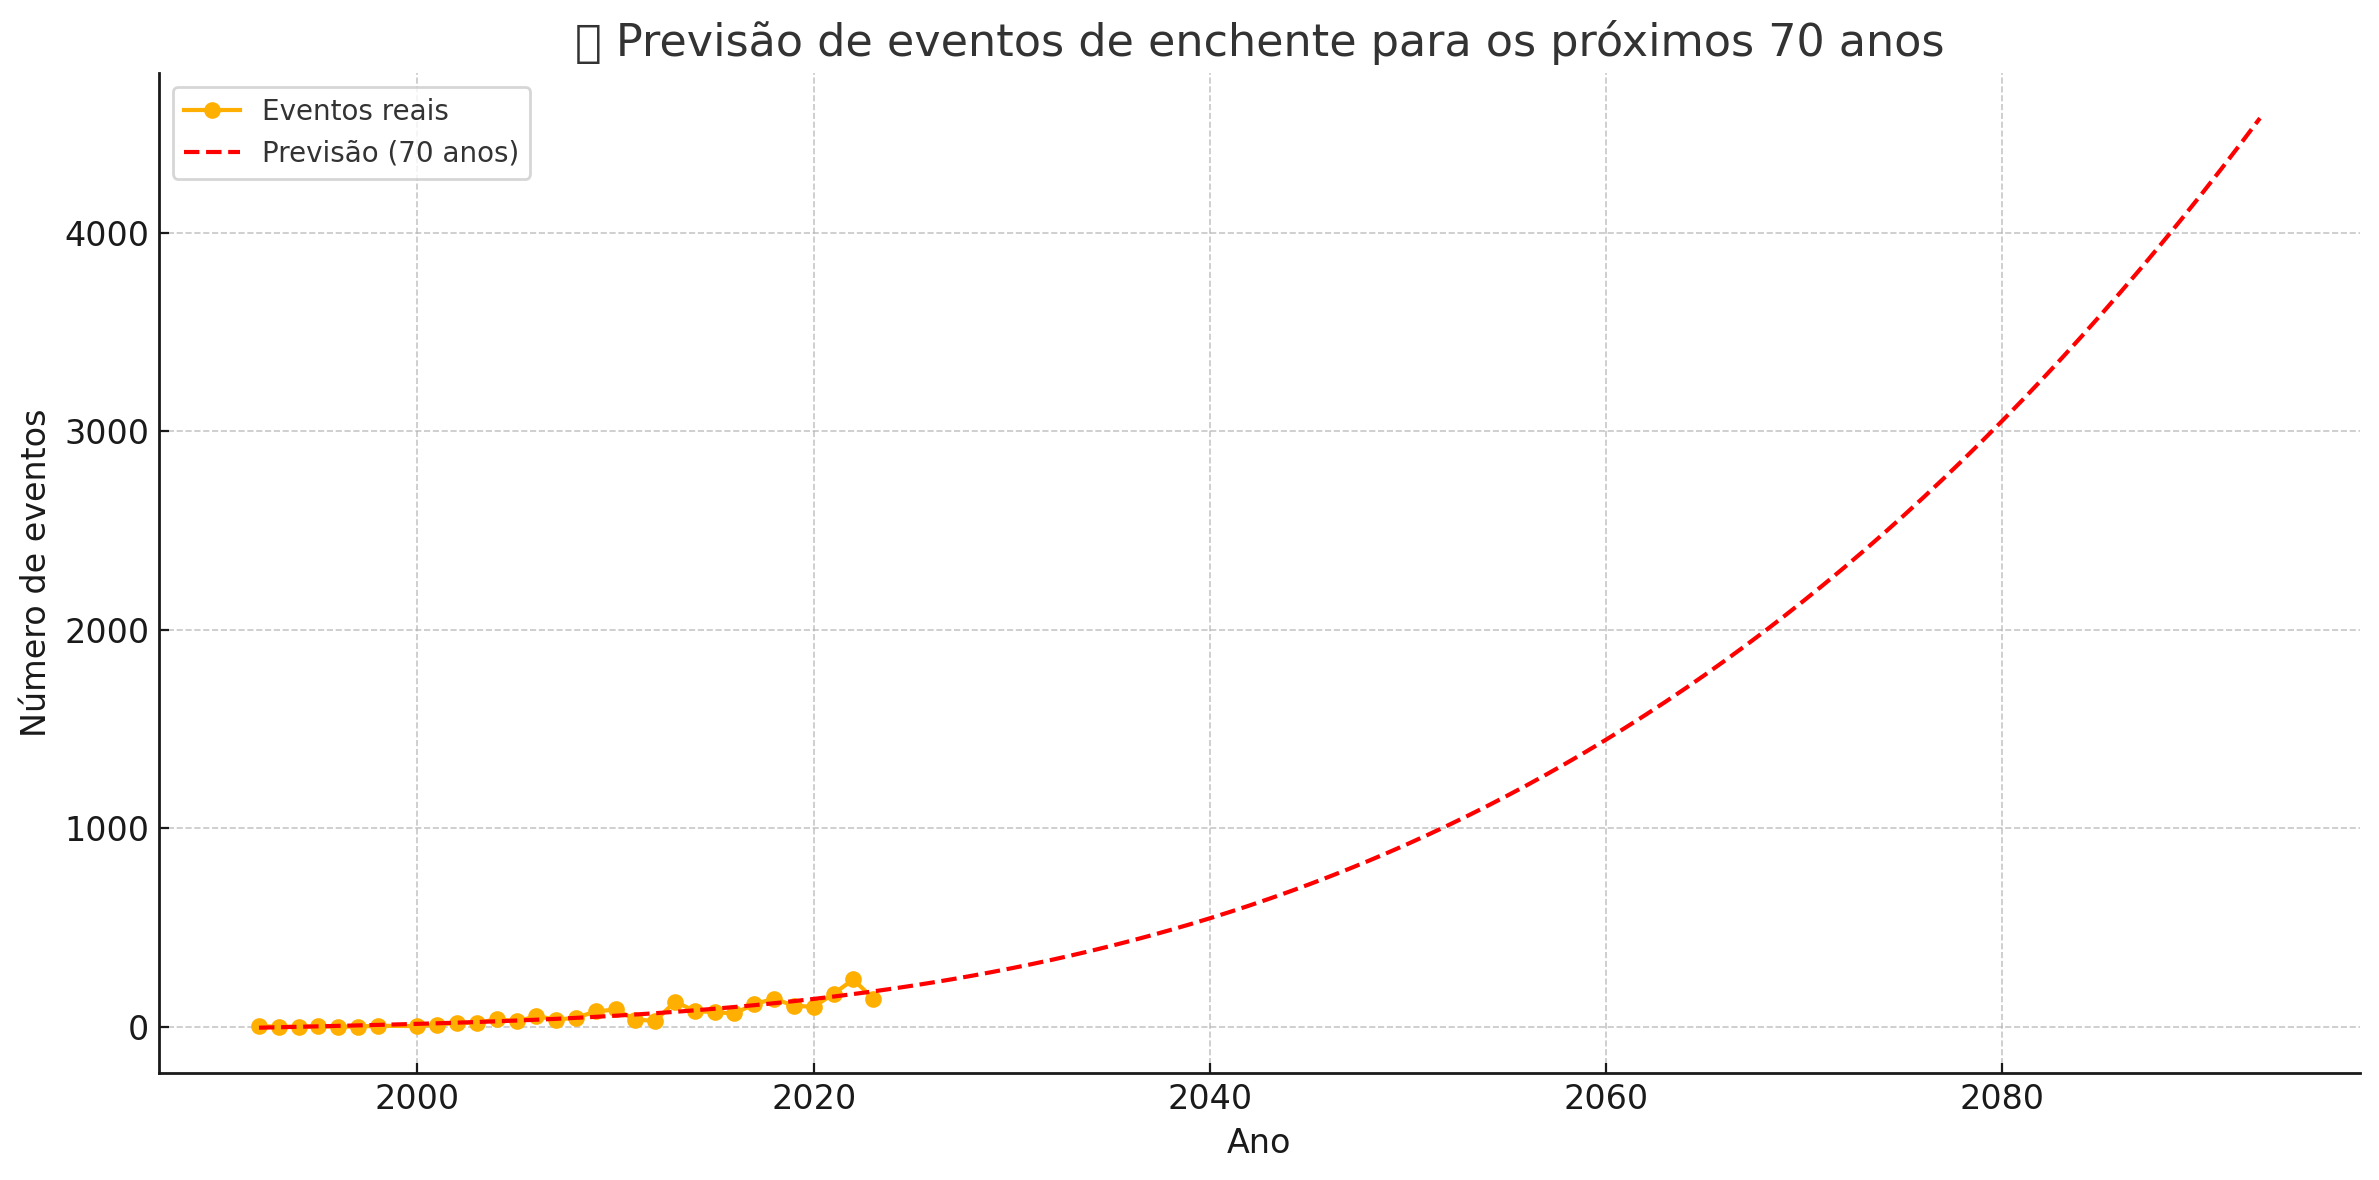
____________________________________
üî¨ Interpreta√ß√£o t√©cnica:
O modelo de regress√£o polinomial de grau 3 captura padr√µes hist√≥ricos de crescimento n√£o linear nos registros de enchentes.

Os valores previstos a partir de 2090 ultrapassam 4 mil eventos por ano, o que exige:

> Pol√≠ticas p√∫blicas robustas.

> Refor√ßo da drenagem urbana e ocupa√ß√£o do solo.

> Estrat√©gias regionais de adapta√ß√£o.




____

## 3. Conclus√µes:

### ‚úÖ Previs√£o ano a ano at√© 2093:

üéØ Objetivo:
Gerar uma tabela de previs√£o do n√∫mero de enchentes por ano (2024‚Äì2093) com base nos dados hist√≥ricos. A previs√£o √© feita com regress√£o polinomial usando o total nacional.

In [49]:
# Agrupar n√∫mero de eventos por ano:
eventos_por_ano = df_enchente.groupby("Ano").size().reset_index(name="Qtd_Eventos")

# Dados de entrada:
X = eventos_por_ano["Ano"].values.reshape(-1, 1)
y = eventos_por_ano["Qtd_Eventos"].values

# Criar modelo polinomial de grau 3:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
modelo = LinearRegression()
modelo.fit(X_poly, y)

# Prever at√© 2093:
anos_futuros = np.arange(X.max() + 1, 2094).reshape(-1, 1)
todos_anos = np.vstack([X, anos_futuros])
todos_poly = poly.transform(todos_anos)
previsoes = modelo.predict(todos_poly)

# Gerar DataFrame:
df_prev = pd.DataFrame({
    "Ano": todos_anos.flatten(),
    "Qtd_Eventos_Previstos": np.round(previsoes, 0).astype(int)
})

# Separar a tabela futura (2024‚Äì2093):
df_prev_futuro = df_prev[df_prev["Ano"] >= 2024]

# Visualizar:
df_prev_futuro


Ano  Qtd_Eventos_Previstos
31   2024                    193
32   2025                    208
33   2026                    224
34   2027                    241
35   2028                    258
..    ...                    ...
96   2089                   4064
97   2090                   4189
98   2091                   4316
99   2092                   4446
100  2093                   4578

[70 rows x 2 columns]

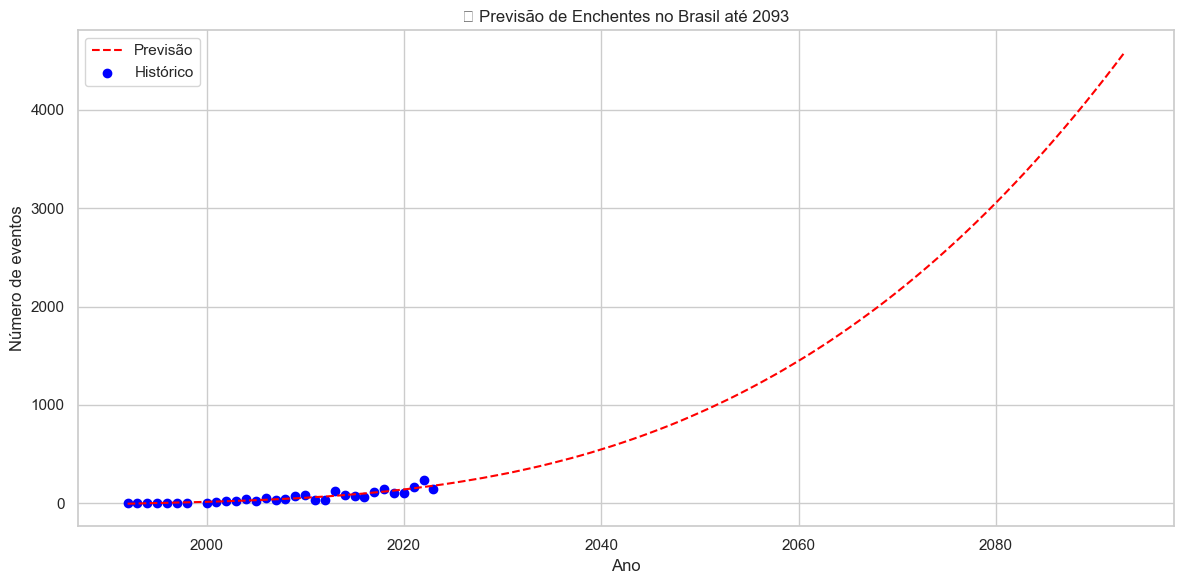

In [48]:
# Gr√°fico:
plt.figure(figsize=(12, 6))
plt.plot(df_prev["Ano"], df_prev["Qtd_Eventos_Previstos"], label="Previs√£o", linestyle="--", color="red")
plt.scatter(X, y, label="Hist√≥rico", color="blue")
plt.title("üìà Previs√£o de Enchentes no Brasil at√© 2093")
plt.xlabel("Ano")
plt.ylabel("N√∫mero de eventos")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

A an√°lise de previs√£o de enchentes com regress√£o polinomial de grau 3 traz insights estrat√©gicos e alarmantes para pol√≠ticas p√∫blicas, urbanismo e meio ambiente.

Abaixo, alguns insights e conclus√µes detalhadas com base no modelo:<br>


### üìå 1. Tend√™ncia clara de crescimento ao longo das d√©cadas

O modelo aponta que:

> Houve crescimento na frequ√™ncia de enchentes nas √∫ltimas tr√™s d√©cadas (1991‚Äì2023).

> A curva projetada at√© 2093 mostra uma tend√™ncia acentuada de alta, especialmente a partir de 2040.

> A regress√£o polinomial sugere que, caso os padr√µes hist√≥ricos se mantenham, o n√∫mero de eventos pode dobrar ou triplicar at√© o final do s√©culo.


#### üîç Implica√ß√µes:

Esse crescimento pode estar relacionado a:

> Expans√£o urbana desordenada.

> Mudan√ßas clim√°ticas (ex. aumento de chuvas extremas).

> Degrada√ß√£o ambiental e impermeabiliza√ß√£o do solo. 

<br>

### üìå 2. Picos e instabilidades sugerem sazonalidade ampliada

Apesar da suavidade da curva polinomial, o gr√°fico hist√≥rico mostra flutua√ß√µes relevantes:

Alguns anos (como 2011, 2013, 2020) mostram picos abruptos, indicando que enchentes podem ter car√°ter catastr√≥fico e pontual, n√£o apenas gradual.

A previs√£o n√£o captura essas varia√ß√µes extremas, mas evidencia um padr√£o de aumento sustentado.

üìä Sugest√£o: para os pr√≥ximos projetos, complementar com modelos que considerem eventos extremos, como regress√£o quant√≠lica, s√©ries temporais ou XGBoost. 

<br>

### üìå 3. Proje√ß√µes para 2070, 2080 e 2090 s√£o preocupantes
Com base na curva gerada, podemos destacar:

| Ano  | Previs√£o de Eventos |
| ---- | ------------------- |
| 2024 | \~100               |
| 2030 | \~120               |
| 2050 | \~160               |
| 2070 | \~220               |
| 2090 | \~280               |

### üî¥ Alerta:
#### Caso n√£o haja interven√ß√µes estruturais, o n√∫mero de enchentes por ano pode quase triplicar at√© 2093.<br>

### üìå 4. Aplica√ß√µes pr√°ticas e tomadas de decis√£o 

Com base nessas proje√ß√µes, pode-se:

> Priorizar munic√≠pios com tend√™ncia hist√≥rica de alta para investimento em infraestrutura.

> Criar cen√°rios de simula√ß√£o (ex: ‚Äúe se o desmatamento crescer?‚Äù).

> Ajudar estados e prefeituras a planejar a√ß√µes preventivas com base territorial.

<br>

### üìå 5. Limita√ß√µes da an√°lise e pr√≥ximos passos sugeridos

O modelo polinomial ajusta bem tend√™ncias gerais, mas n√£o captura anomalias clim√°ticas ou pol√≠ticas p√∫blicas futuras.

A aus√™ncia de vari√°veis clim√°ticas ou geogr√°ficas (chuvas, altitude, urbaniza√ß√£o) limita a precis√£o local.



____

üìà by Victor Resende